# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
#Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [26]:
# Create a Beautiful Soup Object
html= browser.html

# Create a BeautifulSoup object from the scraped HTML
soup = BeautifulSoup(html, 'html.parser')

In [27]:
# Extract all rows of data
list_of_trs = soup.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
tds_list = []

# Loop through the scraped data to create a list of rows
for tr in list_of_trs:
    tds = tr.find_all("td")
    tds_dic = {"id": tds[0].text, 
               "terrestrial_date": tds[1].text, 
               "sol":tds[2].text,
               "ls":tds[3].text,
               "month":tds[4].text,
               "min_tem":tds[5].text,
               "pressure":tds[6].text
              }
    tds_list.append(tds_dic)


In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(tds_list)

In [30]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_tem,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [31]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_tem             object
pressure            object
dtype: object

In [32]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = mars_df["sol"].astype('int')
mars_df["ls"] = mars_df["ls"].astype('int')
mars_df["month"] = mars_df["month"].astype('int')
mars_df["min_tem"] = mars_df["min_tem"].astype('float')
mars_df["pressure"] = mars_df["pressure"].astype('float')
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_tem                    float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
month_mars = len(mars_df['month'].unique())
month_mars

12

In [34]:
# 2. How many sols (Martian days) worth of data are there?
count_sols =  mars_df["sol"].count()
count_sols

1867

In [35]:
# 3. What is the average minimum temperature by month?
avg_mars_month = mars_df.groupby("month")["min_tem"].mean()
avg_mars_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_tem, dtype: float64

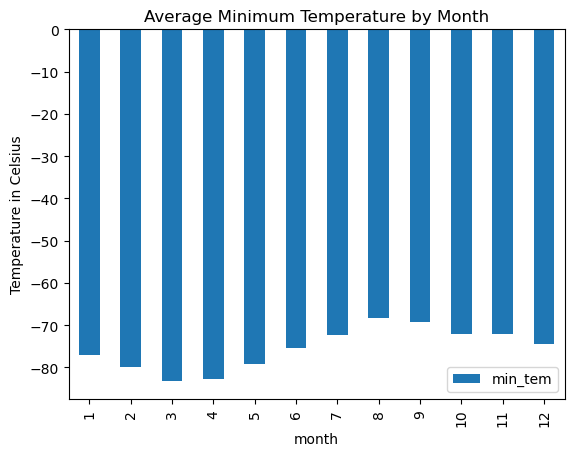

In [36]:
# Plot the average minimum temperature by month
avg_mars_month_df = avg_mars_month.to_frame()
avg_mars_month_df.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

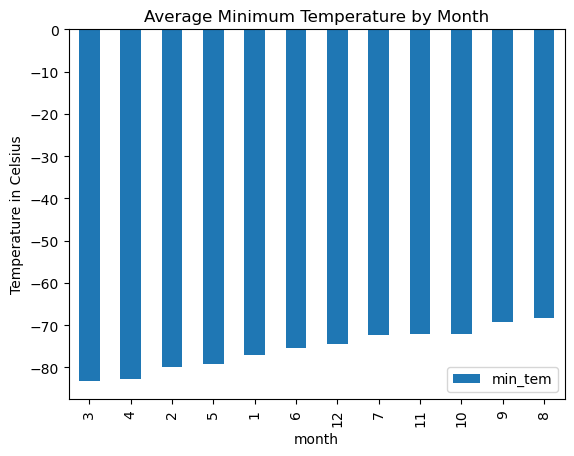

In [37]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_mars_month_reorder_df = avg_mars_month_df.sort_values(by = 'min_tem', ascending = True)
avg_mars_month_reorder_df.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

In [38]:
# 4. What is the average pressure by month?
avg_mars_pressure = mars_df.groupby('month')['pressure'].mean()
avg_mars_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

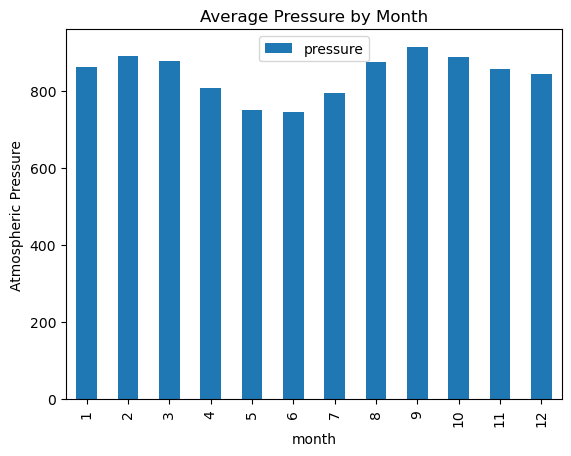

In [39]:
# Plot the average pressure by month
avg_mars_pressure_df = avg_mars_pressure.to_frame()
avg_mars_pressure_df.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

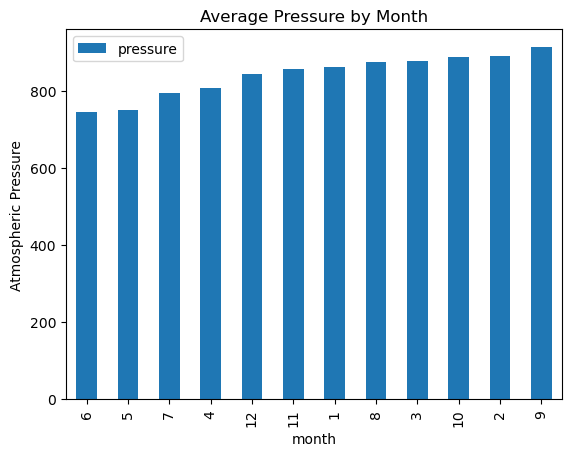

In [40]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_mars_pressure_reorder_df = avg_mars_pressure_df.sort_values(by ='pressure', ascending = True)
avg_mars_pressure_reorder_df.plot(kind= 'bar')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

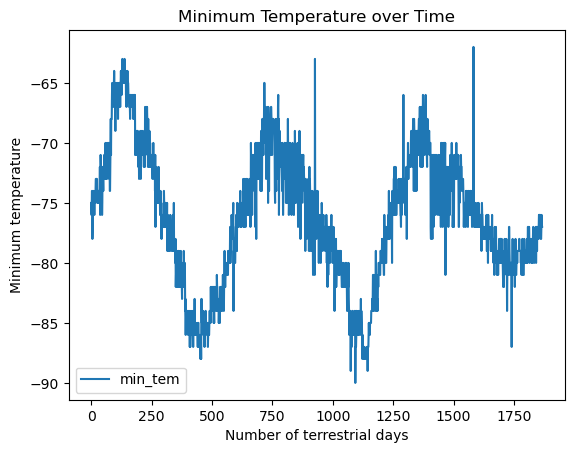

In [41]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
temp_date_df = mars_df.reset_index()
temp_date_df.plot.line(x='index', y='min_tem', xlabel='Number of terrestrial days', ylabel='Minimum temperature', 
                  title='Minimum Temperature over Time')
plt.show()


#### Minimum Temperature

Looking at the Avg Temperature by Month chart, the lowest Month is above -80 degree. The lowest Avg Temperature appears in Month 3 and 4 while the highest temperatures are in month 9 and 8. After 5th month, the temperature increases. Also, we do not see any positive tempature, the average tempareture is btw -75 and above - 85 degrees through out the year.

#### Atmospheric Pressure

Looking at the Avg Pressure by Month, the lowest pressure is btw 6 and 5. The pressure is also pretty high in Month 4, 3, 2 before Month 6, but we see the highest pressure in Month 9. There is increase in pressure after Month of 8 and on. Overall, the pressure is pretty high, it is btw above 750 and above 850 through out the year. 

#### Year Length

Looking at the number of terrestrial days chart, the highest temp is around in 150 days, and the next one is after 750 day, and the next peak is at around 1450 days. When we look at the differences in these days, it is about every 650 days we see peak in the tempature. Similarly, around every 600 days, we see lowest temperatures. Again, tempature is in minus degrees. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
import csv

#Path to the CSV file
csv_file = 'output_data/MarsData_Output.csv'

#Writing to CSV
mars_df.to_csv(csv_file, index=False)
   

In [43]:
browser.quit()